In [16]:
import numpy as np
from keras.datasets import mnist, fashion_mnist
import pandas as pd
from keras.layers import Input, Dense, concatenate 
from keras.models import Model
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
from sklearn.decomposition import PCA
import glob
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

In [2]:
from MulticoreTSNE import MulticoreTSNE as TSNEGPU

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.
train_images = train_images.reshape((len(x_train), np.prod(train_images.shape[1:])))

In [4]:
mrk = {"0.2": "x", "0.5": ".", "0.8": "h", "1.0" : "+", "2.0" : "s"}
color = {"3": "red", "5": "blue", "9": "green", "13" : "pink", "15" : "black"}
def res_to_values(result):
    values = []
    for r in result:
        name = r.split("/")[1]
        lmb = name.split("_")[0][1:]
        ng = name.split("_")[1][1:]
        with open(r) as l:
            scores = l.readlines()
        nmi = float(scores[0][4:-2])
        ari = float(scores[1][4:-2])
        values.append((float(lmb), int(ng), name, nmi, ari))
    return sorted(values)

# LLE only

## Mnist

In [5]:
tsne = TSNEGPU(n_jobs=20, perplexity = 30)
Yv = tsne.fit_transform(x_train)

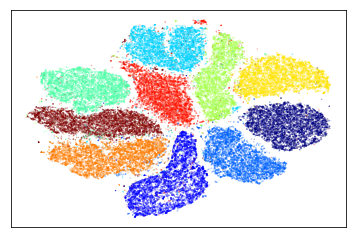

In [9]:
plt.scatter(Yv[:,0], Yv[:,1], c=list(y_train), cmap=plt.cm.get_cmap("jet", 10), marker='.', s=0.1)
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
tsne = TSNEGPU(n_jobs=20, perplexity = 30)
Y3 = tsne.fit_transform(train_images)

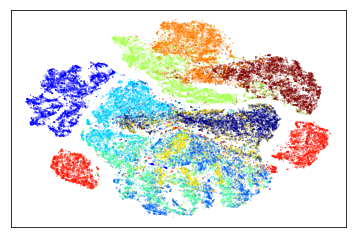

In [17]:
plt.scatter(Y3[:,0], Y3[:,1], c=list(train_labels), cmap=plt.cm.get_cmap("jet", 10), marker='.', s=0.1)
plt.xticks([])
plt.yticks([])
plt.show()

# DAE + LLE

## Mnist

In [24]:
result_mnist = glob.glob("result_mnist/*/*.txt")
values_mnist = res_to_values(result_mnist)
y_train_mnist = pd.read_csv("labels.csv")

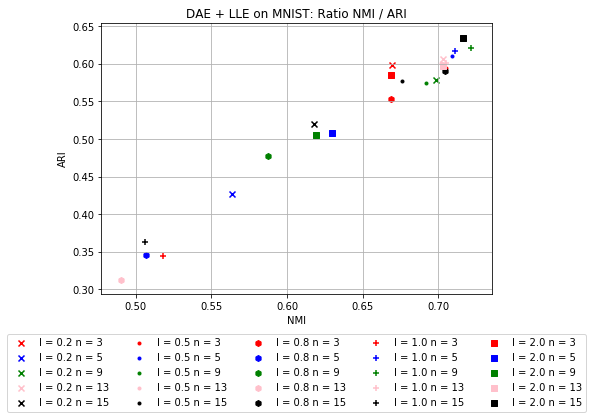

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for r in values_mnist:
    lmb = r[0]
    ng = r[1]
    name = r[2]
    label = "l = "+str(lmb)+" n = "+str(ng)

    nmi = r[3]
    ari = r[4]
    
    ax.scatter(nmi, ari, label=label, marker=mrk[str(lmb)], c=color[str(ng)])

ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.45), ncol=5)
ax.set_title("DAE + LLE on MNIST: Ratio NMI / ARI")
ax.set_ylabel("ARI")
ax.set_xlabel("NMI")
ax.grid(True)

In [19]:
bottle_mnist = pd.read_csv("result_mnist/l2_n15/bottlneck.csv")
tsn = TSNE(n_components=2, perplexity=40)
X_embedded_mnist = tsn.fit_transform(bottle_mnist[0:1000])

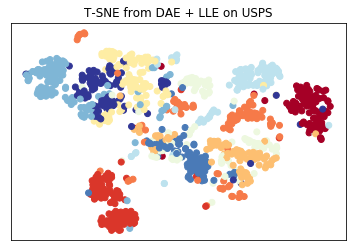

In [20]:
plt.scatter(X_embedded_mnist[:,0], X_embedded_mnist[:,1], c=list(y_train_mnist["0"][0:1000]), cmap=plt.cm.RdYlBu)
plt.title("T-SNE from DAE + LLE on USPS")
plt.xticks([])
plt.yticks([])
plt.show()

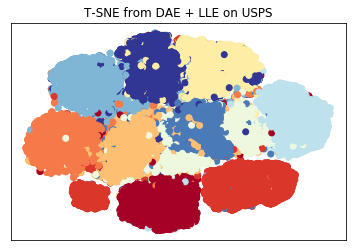

In [26]:
tsne = TSNEGPU(n_jobs=30, perplexity = 30)
Y = tsne.fit_transform(bottle_mnist)
plt.scatter(Y[:,0], Y[:,1], c=list(y_train_mnist["0"]), cmap=plt.cm.RdYlBu)
plt.title("T-SNE from DAE + LLE on USPS")
plt.xticks([])
plt.yticks([])
plt.show()

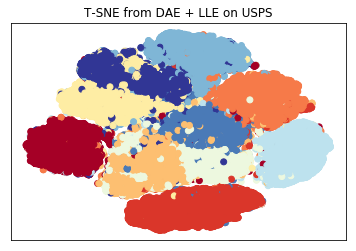

In [24]:
tsne = TSNEGPU(n_jobs=30, perplexity = 40)
Y = tsne.fit_transform(bottle_mnist)
plt.scatter(Y[:,0], Y[:,1], c=list(y_train_mnist["0"]), cmap=plt.cm.RdYlBu)
plt.title("T-SNE from DAE + LLE on USPS")
plt.xticks([])
plt.yticks([])
plt.show()

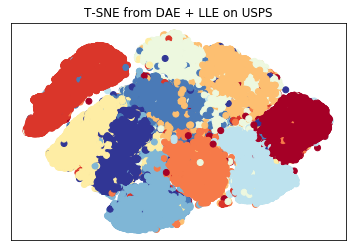

In [25]:
tsne = TSNEGPU(n_jobs=30, perplexity = 50)
Y = tsne.fit_transform(bottle_mnist)
plt.scatter(Y[:,0], Y[:,1], c=list(y_train_mnist["0"]), cmap=plt.cm.RdYlBu)
plt.title("T-SNE from DAE + LLE on USPS")
plt.xticks([])
plt.yticks([])
plt.show()

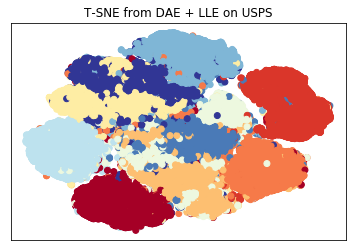

In [27]:
tsne = TSNEGPU(n_jobs=30, perplexity = 45)
Y = tsne.fit_transform(bottle_mnist)
plt.scatter(Y[:,0], Y[:,1], c=list(y_train_mnist["0"]), cmap=plt.cm.RdYlBu)
plt.title("T-SNE from DAE + LLE on USPS")
plt.xticks([])
plt.yticks([])
plt.show()

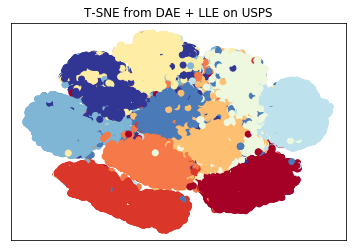

In [28]:
tsne = TSNEGPU(n_jobs=30, perplexity = 35)
Y = tsne.fit_transform(bottle_mnist)
plt.scatter(Y[:,0], Y[:,1], c=list(y_train_mnist["0"]), cmap=plt.cm.RdYlBu)
plt.title("T-SNE from DAE + LLE on USPS")
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
bottle_mnist = pd.read_csv("result_mnist/l2_n15/bottlneck.csv", header=None)
y_train_mnist = pd.read_csv("mnist_label.csv", header=None)

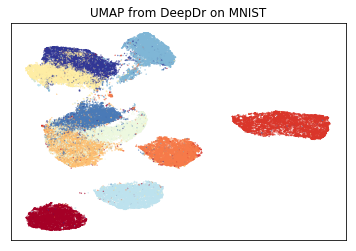

In [37]:
#embedding = umap.UMAP(n_neighbors=10).fit_transform(bottle_mnist)
plt.scatter(embedding[:,0], embedding[:,1], c=list(y_train_mnist[0]), cmap=plt.cm.RdYlBu, s=0.1)
plt.title("UMAP from DeepDr on MNIST")
plt.xticks([])
plt.yticks([])
plt.show()

### Fasion MNIST

In [39]:
bottle_fashion = pd.read_csv("result_fashion/test05_3.csv")
y_train_fashion = pd.read_csv("fashion_labels.csv")

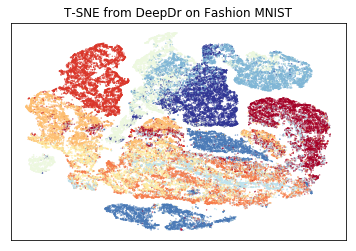

In [41]:
#tsne = TSNEGPU(n_jobs=10, perplexity = 35)
#Y = tsne.fit_transform(bottle_fashion)
plt.scatter(Y[:,0], Y[:,1], c=list(y_train_fashion["0"]), cmap=plt.cm.RdYlBu, s=0.1)
plt.title("T-SNE from DeepDr on Fashion MNIST")
plt.xticks([])
plt.yticks([])
plt.show()

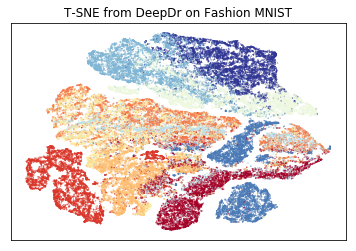

In [22]:
tsne = TSNEGPU(n_jobs=10, perplexity = 35)
Y = tsne.fit_transform(bottle_fashion)
plt.scatter(Y[:,0], Y[:,1], c=list(y_train_fashion["0"]), cmap=plt.cm.RdYlBu, s=0.1)
plt.title("T-SNE from DeepDr on Fashion MNIST")
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
embedding = umap.UMAP(n_neighbors=10,).fit_transform(bottle_fashion)

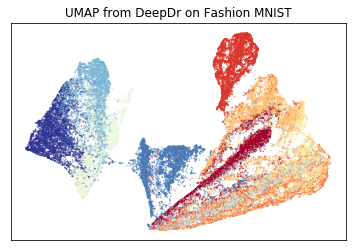

In [21]:
plt.scatter(embedding[:,0], embedding[:,1], c=list(y_train_fashion["0"]), cmap=plt.cm.RdYlBu, s=0.1)
plt.title("UMAP from DeepDr on Fashion MNIST")
plt.xticks([])
plt.yticks([])
plt.show()

## Usps

In [15]:
result_us= glob.glob("result_usps/*/*.txt")
values_us = res_to_values(result_us)
y_train_usps = pd.read_csv("usps_labels.csv")

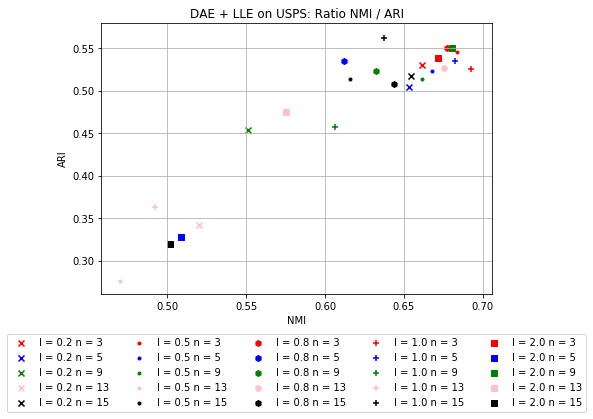

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for r in values_us:
    lmb = r[0]
    ng = r[1]
    name = r[2]
    label = "l = "+str(lmb)+" n = "+str(ng)

    nmi = r[3]
    ari = r[4]
    
    ax.scatter(nmi, ari, label=label, marker=mrk[str(lmb)], c=color[str(ng)])

ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.45), ncol=5)
ax.set_title("DAE + LLE on USPS: Ratio NMI / ARI")
ax.set_ylabel("ARI")
ax.set_xlabel("NMI")
ax.grid(True)

In [13]:
bottle_usps = pd.read_csv("result_usps/l2_n9/bottlneck.csv")

In [14]:
tsn = TSNE(n_components=2)
X_embedded_usps = tsn.fit_transform(bottle_usps)

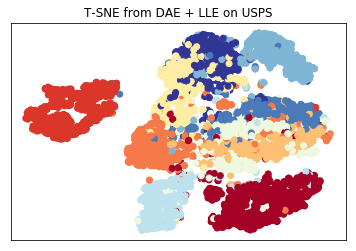

In [30]:
plt.scatter(X_embedded_usps[:,0], X_embedded_usps[:,1], c=list(y_train_usps["0"]), cmap=plt.cm.RdYlBu)
plt.title("T-SNE from DAE + LLE on USPS")
plt.xticks([])
plt.yticks([])
plt.show()

## Pendigits

In [116]:
result_pen = glob.glob("result_pendigits/*/*.txt")
values_pen = res_to_values(result_pen)
y_train_pen = pd.read_csv("pendigits_labels.csv", header=None)

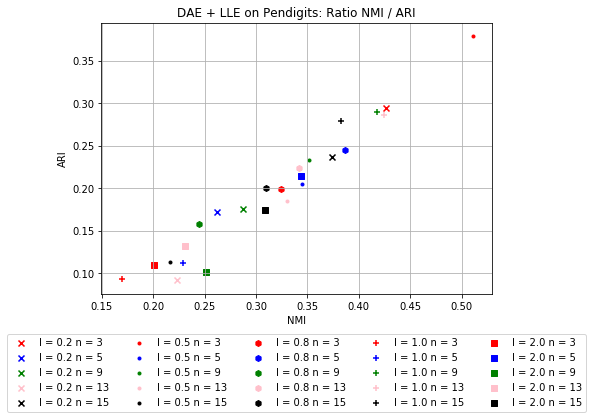

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for r in values_pen:
    lmb = r[0]
    ng = r[1]
    name = r[2]
    label = "l = "+str(lmb)+" n = "+str(ng)

    nmi = r[3]
    ari = r[4]
    
    ax.scatter(nmi, ari, label=label, marker=mrk[str(lmb)], c=color[str(ng)])

ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.45), ncol=5)
ax.set_title("DAE + LLE on Pendigits: Ratio NMI / ARI")
ax.set_ylabel("ARI")
ax.set_xlabel("NMI")
ax.grid(True)

In [132]:
bottle_pen = pd.read_csv("result_pendigits/l0.5_n3/bottlneck.csv", header=None)

In [133]:
tsn = TSNE(n_components=2)
X_embedded_pen = tsn.fit_transform(bottle_pen)

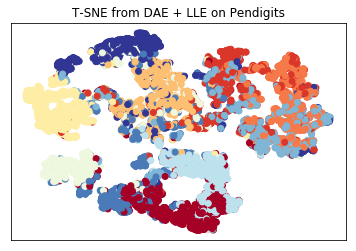

In [134]:
plt.scatter(X_embedded_pen[:,0], X_embedded_pen[:,1], cmap=plt.cm.RdYlBu, c=list(y_train_pen[0]))
plt.title("T-SNE from DAE + LLE on Pendigits")
plt.xticks([])
plt.yticks([])
plt.show()

# DAE classique 

In [7]:
import numpy as np
from keras.datasets import mnist
import pandas as pd
from keras.layers import Input, Dense, concatenate, Lambda
from keras.models import Model
from keras import optimizers, objectives
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from sklearn.decomposition import PCA
import glob

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [29]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(784,), name="inp_img")
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(2, activation='relu', name="bottleneck")(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

bottleneck_model = Model(inputs=autoencoder.get_layer("inp_img").input, outputs=autoencoder.get_layer("bottleneck").output)

In [31]:

# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# autoencoder.fit(x_train, x_train,
#                 epochs=50,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

In [33]:
bott = bottleneck_model.predict(x_train)

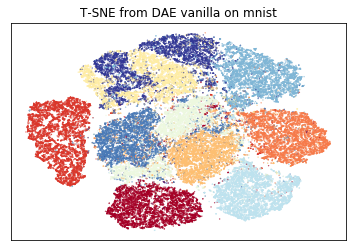

In [43]:
# tsne = TSNE(perplexity = 35)
# Y = tsne.fit_transform(bott)
plt.scatter(Y[:,0], Y[:,1], c=list(y_train_mnist["0"]), cmap=plt.cm.RdYlBu,  s=0.1)
plt.title("T-SNE from DAE vanilla on mnist")
plt.xticks([])
plt.yticks([])
plt.show()

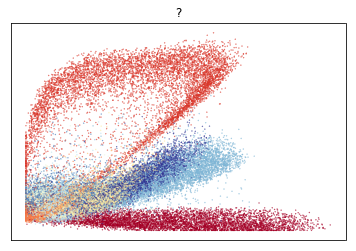

In [35]:
plt.scatter(bott[:,0], bott[:,1], c=list(y_train_mnist["0"]), cmap=plt.cm.RdYlBu, s=0.1)
plt.title("?")
plt.xticks([])
plt.yticks([])
plt.show()

In [37]:
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(2, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [40]:
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# autoencoder.fit(x_train, x_train,
#                 epochs=50,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

In [41]:
bb = encoder.predict(x_train)

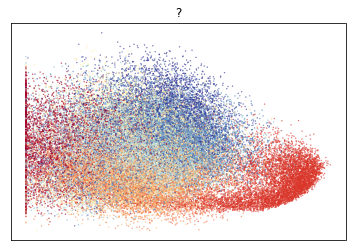

In [42]:
plt.scatter(bb[:,0], bb[:,1], c=list(y_train_mnist["0"]), cmap=plt.cm.RdYlBu, s=0.1)
plt.title("?")
plt.xticks([])
plt.yticks([])
plt.show()